<a href="https://colab.research.google.com/github/Lumiwarum/RS/blob/main/RS_midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import sympy as smp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter

## **Problem Set 1: Attitude, Rigid Body, Lagrange**

#### **Problem №1: Lie Integration**

Consider the kinematics of a rotating body parametrized with quaternions, as described by the following ODE:

$$
\dot{\mathbf{q}} = \frac{1}{2}\mathbf{q} \otimes \hat{\boldsymbol{\omega}}
$$

where $\mathbf{q} \in \mathbb{S}^3$ is the unit quaternion and $\hat{\boldsymbol{\omega}} = [0, \boldsymbol{\omega}]$ is the "angular velocity quaternion" with $\boldsymbol{\omega} \in \mathbb{R}^3$ being the angular velocity.

Do the following:

* **[10 points]** When selecting a random angular velocity $\boldsymbol{\omega}$, use either the forward or backward Euler method to simulate the motion of the system. Afterwards, check the norm of the quaternion, plot trajectories, and animate the motion, then discuss the results.
* **[10 points]** Instead of Euler integration, apply the following technique: $\mathbf{q}_{k+1} = \mathbf{q}_k \otimes \text{exp}(\frac{1}{2}\hat{\boldsymbol{\omega}}_kdt)$, where $\text{exp}(\mathbf{q})$ is the **quaternion exponential**. Check the norm of the quaternion, plot the trajectories, animate the motion, and compare the results with Euler integration.

---


In [ ]:
def quat_product(p, q):
  pq = np.concatenate(([p[0]*q[0]-p[1:4].T @ q[1:4]], p[0]*q[1:4]+ q[0]*p[1:4]+np.cross(p[1:4],q[1:4])))
  return pq

def system(state, Omega_hat):
  # processing the state
  Q =state

  #dynamics
  dQ = quat_product((1/2) * Q, Omega_hat)
  return dQ

def quaternion2angleAxis(q):
    q1, q2, q3, q4 = q
    halfAngle = np.arccos(q1)
    x = q2 / np.sin(halfAngle)
    y = q3 / np.sin(halfAngle)
    z = q4 / np.sin(halfAngle)
    return np.array([halfAngle*2, x, y, z])

In [ ]:
def forward_euler(system,  state, dt, omega_hat):
  fxy = system( state, omega_hat)
  return state + dt*fxy

In [ ]:
from scipy.integrate import odeint, solve_ivp
state0 = np.array([1, 0, 0, 0])
omega0 = np.array([np.pi, np.pi/2, np.pi/4])
omega_hat = np.concatenate(([0], omega0))
t = np.linspace(0, 20, 1000)
dt = t[1]-t[0]
sol = []
axil_sol = []
for i, time in enumerate(t):
  state0 = forward_euler(system, state0, dt, omega_hat)
  sol.append(state0)
  axil_sol.append(quaternion2angleAxis(state0))


<ipython-input-5-509fb529b13b>:16: RuntimeWarning: divide by zero encountered in double_scalars
  x = q2 / np.sin(halfAngle)
<ipython-input-5-509fb529b13b>:17: RuntimeWarning: divide by zero encountered in double_scalars
  y = q3 / np.sin(halfAngle)
<ipython-input-5-509fb529b13b>:18: RuntimeWarning: divide by zero encountered in double_scalars
  z = q4 / np.sin(halfAngle)
<ipython-input-5-509fb529b13b>:15: RuntimeWarning: invalid value encountered in arccos
  halfAngle = np.arccos(q1)


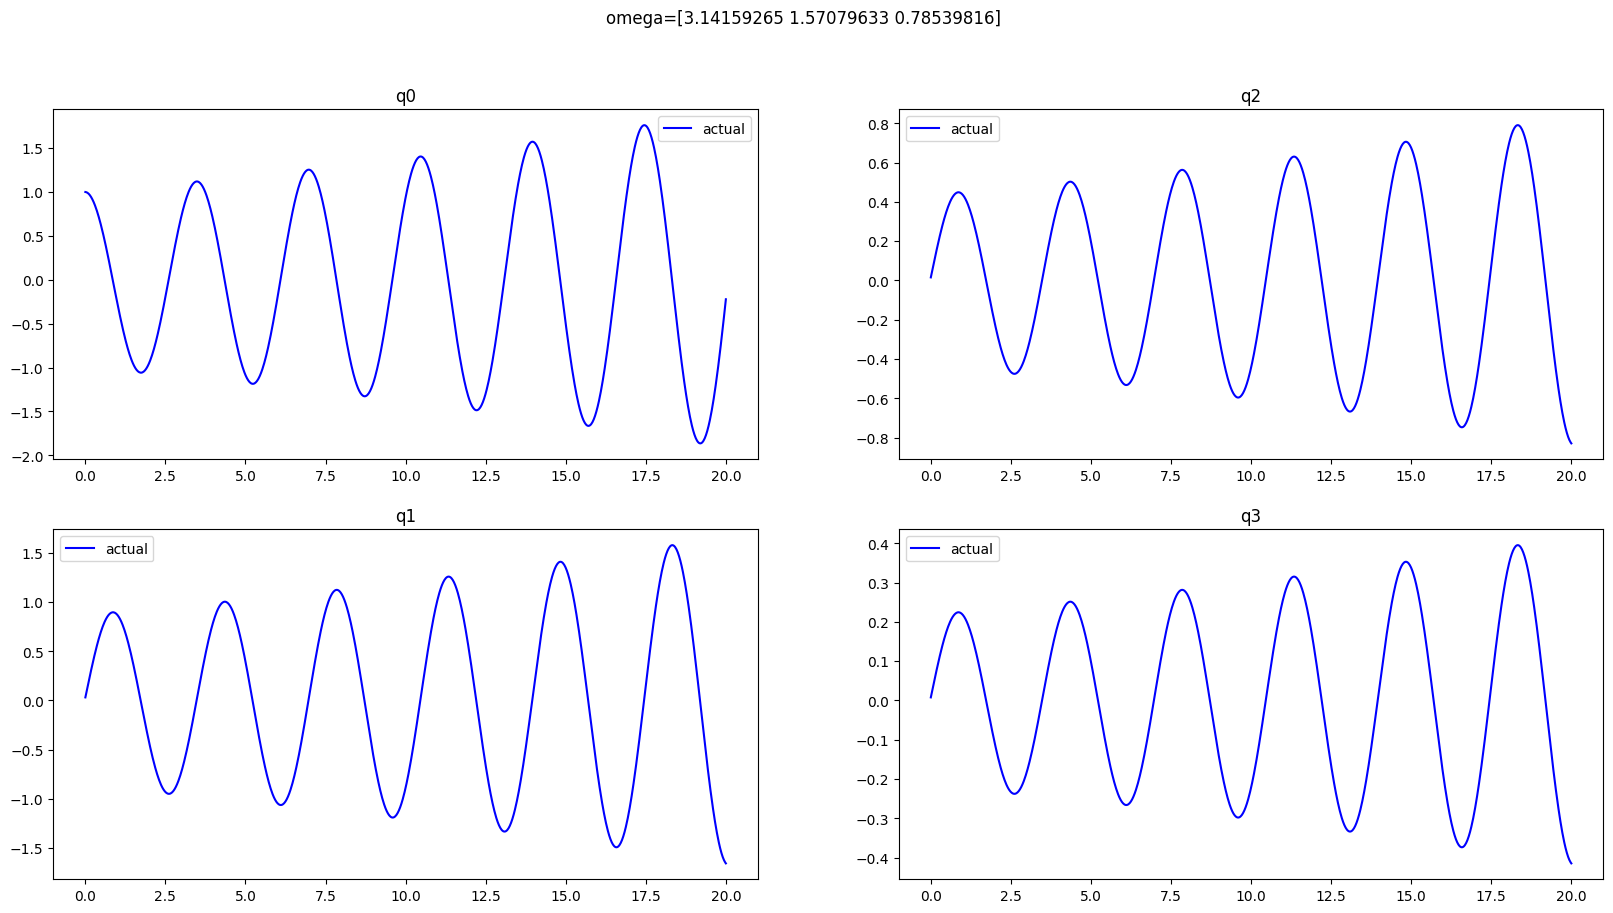

1.912802216633826


In [ ]:
import matplotlib.pyplot as plt
sol = np.array(sol)
fig = plt.figure(figsize = (20, 10))
axs = fig.subplots(2, 2)
for i in range(2):
  for j in range(2):
    axs[i, j].set_title(f'q{i+2*j}')
    axs[i, j].plot(t, sol[:,i+2*j], 'b', label='actual')
    #axs[i, j].plot(error_t, error[:, i+2*j], 'r', label='error')
    #axs[i, j].plot(t, qd[:, i+2*j], 'b--', label='taget')
    axs[i, j].legend()
fig.suptitle(f'omega={omega0}')
plt.show()
print(np.linalg.norm(sol[-1]))

In [ ]:
def quaternion_exp(q):
  vnorm = np.linalg.norm(q[1:4])
  q0 = np.exp(q[0]) * np.cos(vnorm)
  qv = (q0 * np.sin(vnorm) / vnorm) * q[1:4]
  return np.concatenate(([q0], qv))


def expo_sys(state, dt, omega_hat):
  new_omega = (1/2) * omega_hat * dt
  quat_omega = quaternion_exp(new_omega)
  return quat_product(state, quat_omega)


In [ ]:
from scipy.integrate import odeint, solve_ivp
state0 = np.array([1, 0, 0, 5])
state0 = state0/(np.linalg.norm(state0)-1e-5)
print(np.linalg.norm(state0))
omega0 = np.array([np.pi, np.pi/2, np.pi/4])
omega_hat = np.concatenate(([0], omega0))
t = np.linspace(0, 10, 1000)
dt = t[1]-t[0]
sol = []
axil_sol = []
for i, time in enumerate(t):
  state0 = expo_sys(state0, dt, omega_hat)
  sol.append(state0)
  axil_sol.append(quaternion2angleAxis(state0))


1.0000019611651976


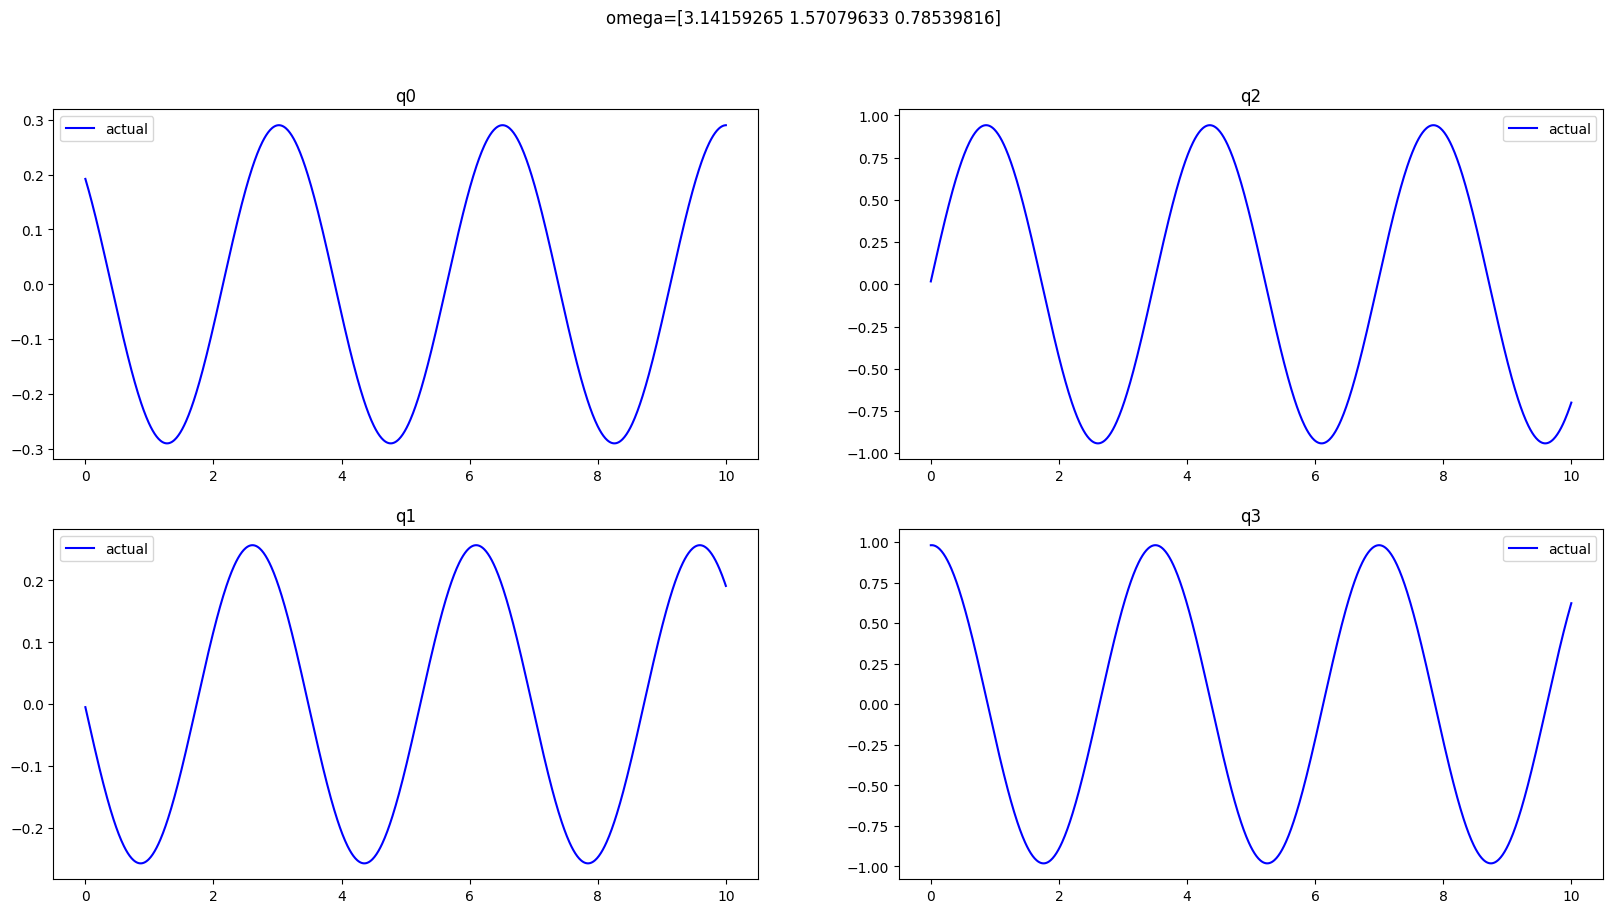

0.9999493253108281


In [ ]:
import matplotlib.pyplot as plt
sol = np.array(sol)
fig = plt.figure(figsize = (20, 10))
axs = fig.subplots(2, 2)
for i in range(2):
  for j in range(2):
    axs[i, j].set_title(f'q{i+2*j}')
    axs[i, j].plot(t, sol[:,i+2*j], 'b', label='actual')
    #axs[i, j].plot(error_t, error[:, i+2*j], 'r', label='error')
    #axs[i, j].plot(t, qd[:, i+2*j], 'b--', label='taget')
    axs[i, j].legend()
fig.suptitle(f'omega={omega0}')
plt.show()
print(np.linalg.norm(sol[-1]))

![](https://drive.google.com/uc?export=view&id=1cfnbPz2NtDvEsTR2JxjPk8asuEsZn1jm)

Explanation:
In the Forward euler equation $\dot{q}dt$ that is added to a previous quaternion not only may contain some numerical error, but also is not garanteed to make a unit quaternion after summation. Therefore the error accumulates over time and the quaternion expands in size.


For the Exponential solution the exponent operation normilizes the $\hat{ω}$ so when we perform the multiplication between two unit quaternions by the defenition of this multiplication we get a unit quaternion. 

Worth mentioning that with decreasing the timestamp for exponential solution quaternions tends to decrease. This is because exponenta is an approximation by sine and cosine function that usually tend to decrease their values when they approximate them, therefore we usually multiply our current quaternion by another that has norm slightly less than 1

#### **Problem №2: Quadrotor Attitude**

Consider the model of quadrotor:
<p align="center">
<img src="https://drive.google.com/uc?id=1S2ZENdiebtmfD4RGuv3mUAVXWoZpAEDL" alt="drawing" width="50%" style="margin:auto"/>
</p>

with following parameters

In [ ]:
m = 0.1 # [kg] - mass of the motors 
M = 0.5 # [kg] mass of the drone body
h = 0.08 # [m] high of the body
R = 0.05 # [m] radius of the body
l = 0.3 # [m] length of arm 
k_t = 0.05 # thrust coefficient 
k_m = 0.001 # torque coefficient 

In [ ]:
B = np.array([[0, l*k_t, 0, -l*k_t],
              [-l*k_t, 0, l*k_t, 0],
              [k_m, -k_m, k_m, -k_m]])

Jx = M * (1/12) * (h**2 + 3* R **2) +2 * (l**2) *m
Jy = M * (1/12) * (h**2 + 3* R **2) +2 * (l**2) *m
Jz = M * (1/2) * (R **2) +4 * (l**2) *m

J = np.diag([Jx, Jy, Jz])

def prop_torque(pro_speed):
  return B @ pro_speed

def quad_system(t, state, pro_speed):
  # processing the state
  q1, q2, q3, q4, w1, w2, w3 =state
  Q = np.array([q1, q2, q3, q4])
  Omega = np.array([w1, w2, w3])

  torque = prop_torque(pro_speed)

  # dynamics
  dQ = quat_product((1/2) * Q, np.concatenate(([0], Omega)))
  domega = np.linalg.inv(J) @ (torque-np.cross(Omega, J @ Omega))

  return np.concatenate((dQ,  domega))

In [ ]:
import math
# runge-kutta fourth-order numerical integration
def rk4(func, tk, _yk, _dt, pro_speed):
  
    # evaluate derivative at several stages within time interval
    f1 = func(tk, _yk, pro_speed)
    f2 = func(tk + _dt / 2, _yk + (f1 * (_dt / 2)), pro_speed)
    f3 = func(tk + _dt / 2, _yk + (f2 * (_dt / 2)), pro_speed)
    f4 = func(tk + _dt, _yk + (f3 * _dt), pro_speed)

    # return an average of the derivative over tk, tk + dt
    return _yk + (_dt / 6) * (f1 + (2 * f2) + (2 * f3) + f4)

def normalize(v, tolerance=0.00001):
    mag2 = sum(n * n for n in v)
    if abs(mag2 - 1.0) > tolerance:
        mag = math.sqrt(mag2)
        v = tuple(n / mag for n in v)
    return np.array(v)

In [ ]:
def plot_graphs(sol, pro_sp):
  sol = np.array(sol)
  fig = plt.figure(figsize = (20, 10))
  axs = fig.subplots(2, 2)
  for i in range(2):
    for j in range(2):
      axs[i, j].set_title(f'q{i+2*j}')
      axs[i, j].plot(t, sol[:,i+2*j], 'b', label='actual')
      #axs[i, j].plot(error_t, error[:, i+2*j], 'r', label='error')
      #axs[i, j].plot(t, qd[:, i+2*j], 'b--', label='taget')
      axs[i, j].legend()
  fig.suptitle(f'speed = {pro_sp}')
  plt.show()

In [ ]:
from scipy.integrate import odeint, solve_ivp

Q0 = np.array([1, 0, 0, 0])
omega0 = np.array([0, 0, 0])
propeller_speeds = np.array([1, 1, 1, 1]) * 100


state0 = np.concatenate((Q0, omega0))

t = np.linspace(0, 5, 5000)
dt = t[1]-t[0]
sol = []
axil_sol = []
for i, time in enumerate(t):
  state0 = rk4(quad_system, time, state0, dt, propeller_speeds)
  Q = state0[:4]
  Q = normalize(Q)
  state0[:4] = Q
  sol.append(state0)
  axil_sol.append(quaternion2angleAxis(Q))


<ipython-input-5-509fb529b13b>:16: RuntimeWarning: invalid value encountered in double_scalars
  x = q2 / np.sin(halfAngle)
<ipython-input-5-509fb529b13b>:17: RuntimeWarning: invalid value encountered in double_scalars
  y = q3 / np.sin(halfAngle)
<ipython-input-5-509fb529b13b>:18: RuntimeWarning: invalid value encountered in double_scalars
  z = q4 / np.sin(halfAngle)


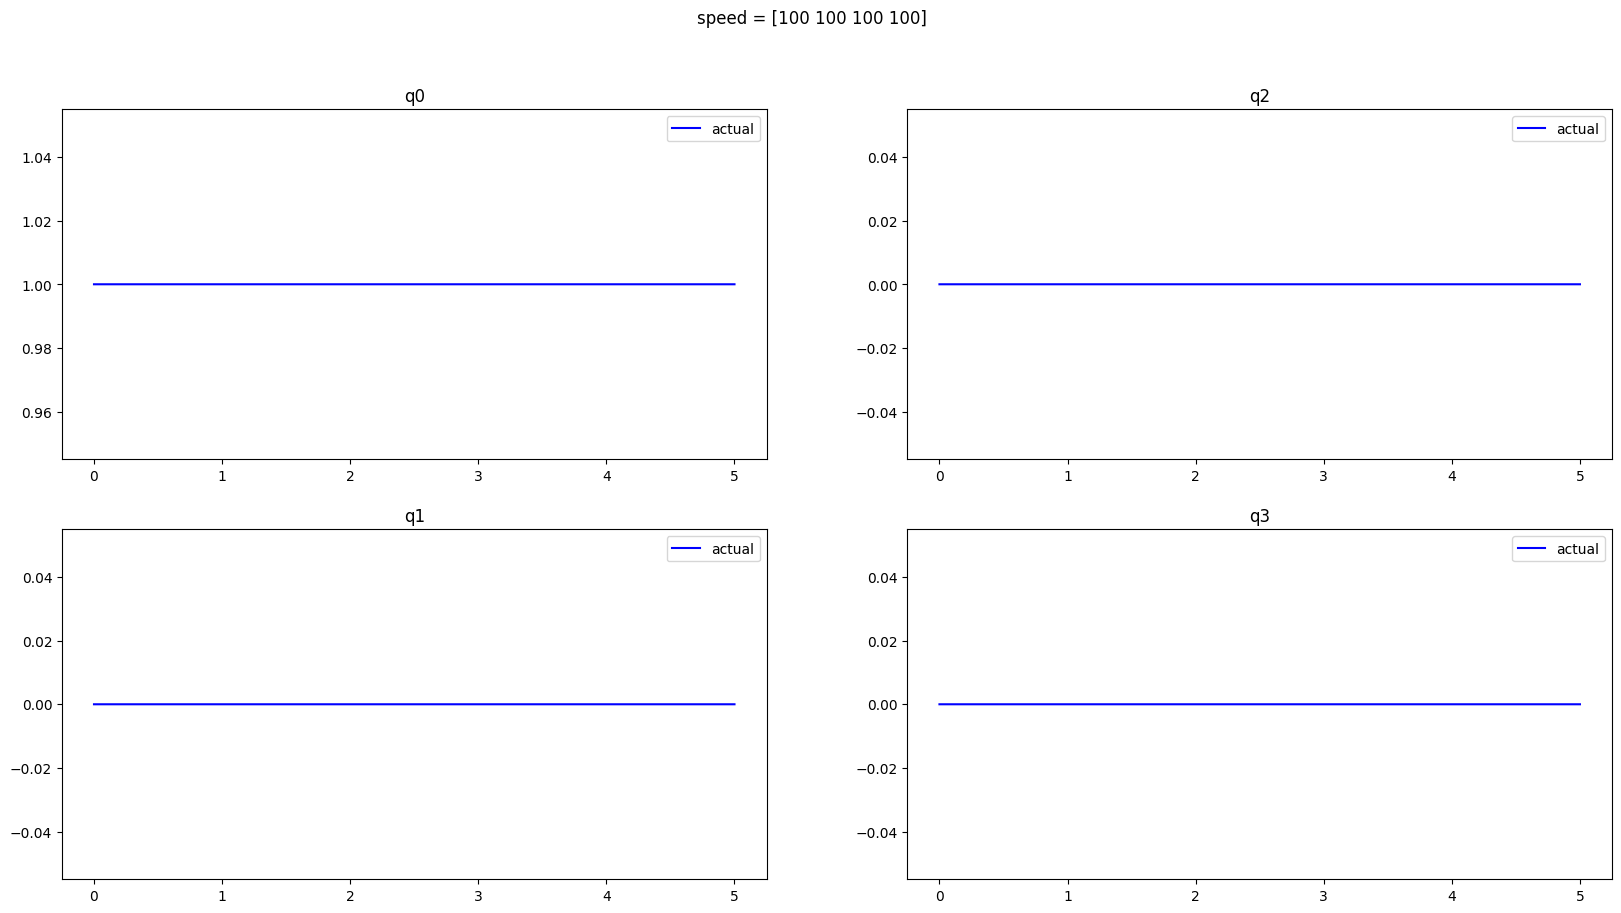

In [ ]:
plot_graphs(sol, propeller_speeds)


![](https://drive.google.com/uc?export=view&id=1HPYvrLm5FUHcmmwG8mNdV_6_-Ij73GOg)

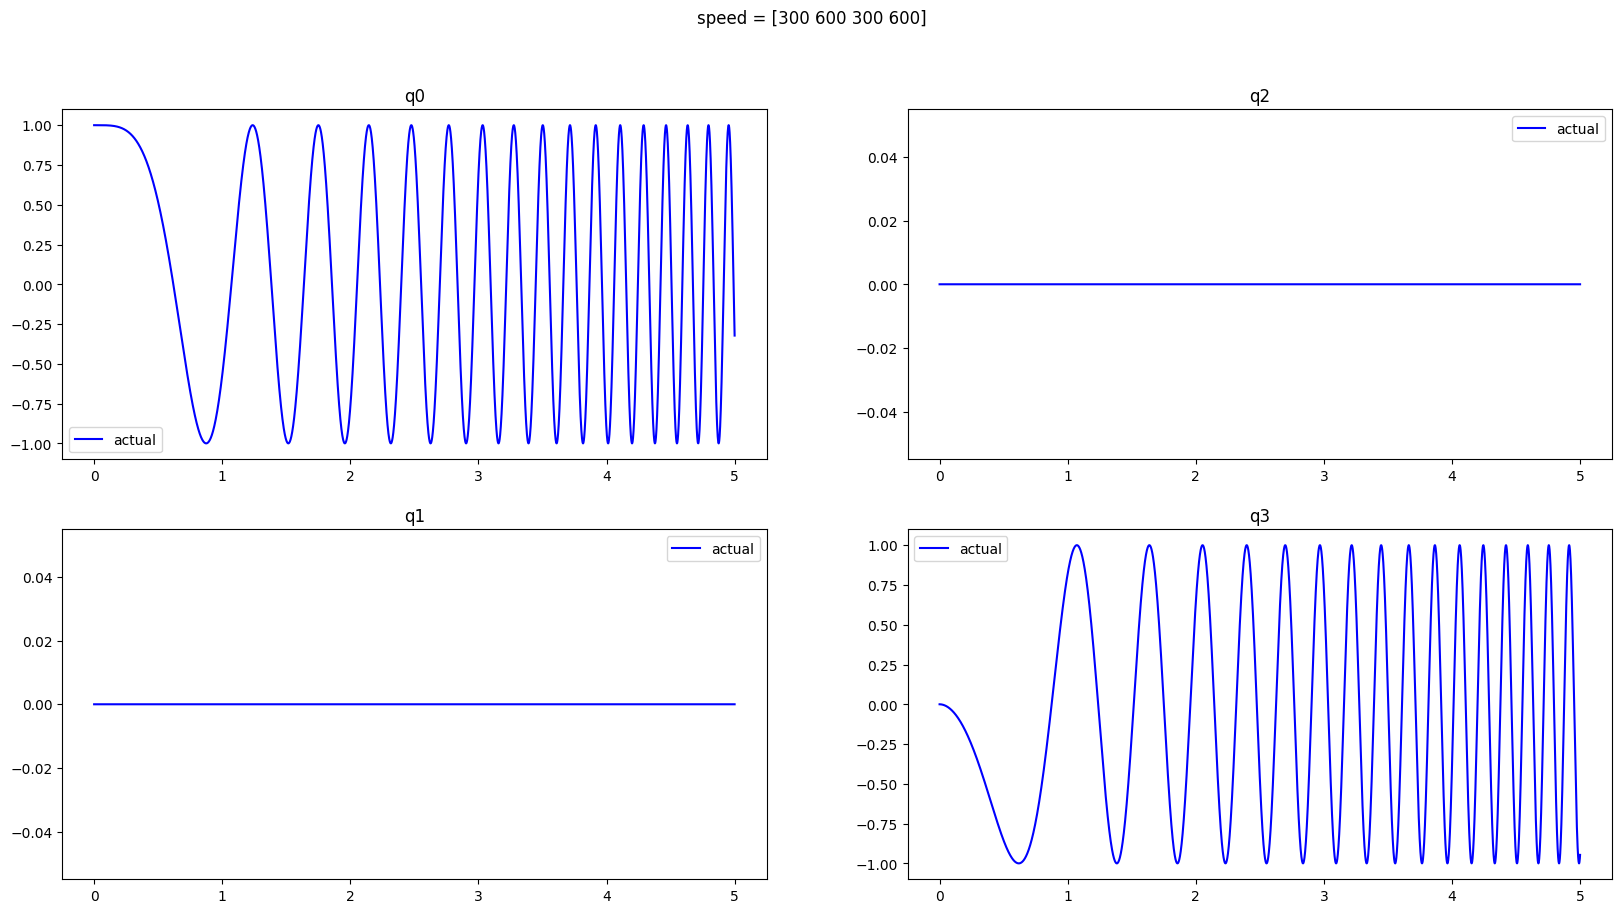

In [ ]:
from scipy.integrate import odeint, solve_ivp

Q0 = np.array([1, 0, 0, 0])
omega0 = np.array([0, 0, 0])
U1 = 3
U2 = U1 *2
propeller_speeds = np.array([U1, U2, U1, U2]) * 100


state0 = np.concatenate((Q0, omega0))

t = np.linspace(0, 5, 5000)
dt = t[1]-t[0]
sol = []
axil_sol = []
for i, time in enumerate(t):
  state0 = rk4(quad_system, time, state0, dt, propeller_speeds)
  Q = state0[:4]
  Q = normalize(Q)
  state0[:4] = Q
  sol.append(state0)
  axil_sol.append(quaternion2angleAxis(Q))

plot_graphs(sol, propeller_speeds)

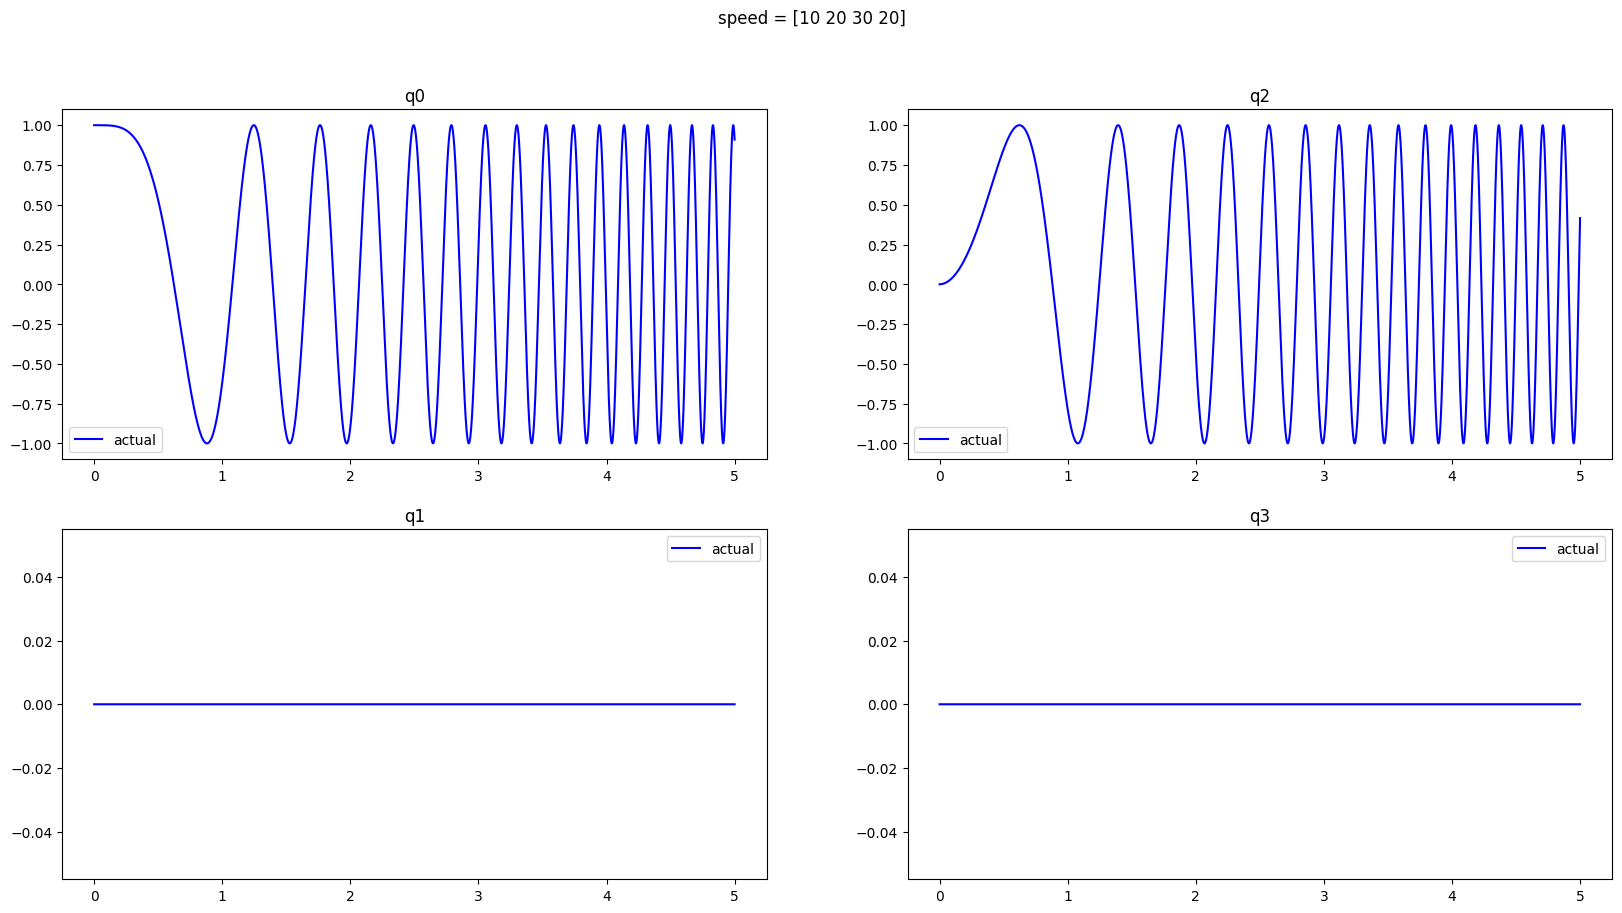

In [ ]:
from scipy.integrate import odeint, solve_ivp

Q0 = np.array([1, 0, 0, 0])
omega0 = np.array([0, 0, 0])
U1 = 1
U2 = 2
U3 = 3
propeller_speeds = np.array([U1, U2, U3, U2]) * 10


state0 = np.concatenate((Q0, omega0))

t = np.linspace(0, 5, 5000)
dt = t[1]-t[0]
sol = []
axil_sol = []
for i, time in enumerate(t):
  state0 = rk4(quad_system, time, state0, dt, propeller_speeds)
  Q = state0[:4]
  Q = normalize(Q)
  state0[:4] = Q
  sol.append(state0)
  axil_sol.append(quaternion2angleAxis(Q))

plot_graphs(sol, propeller_speeds)

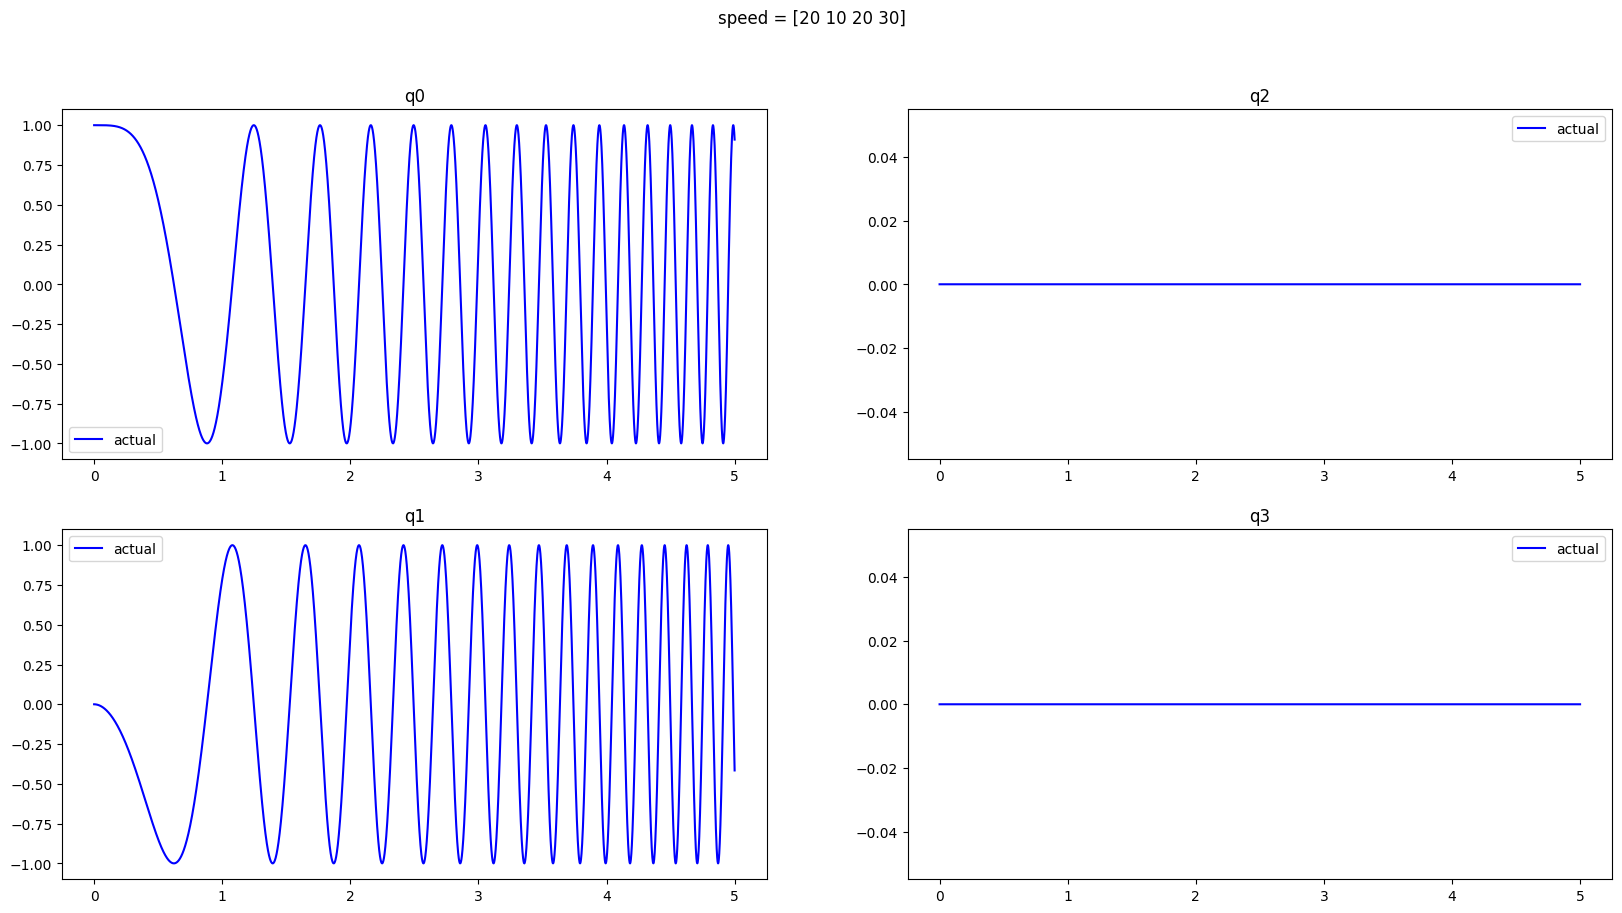

In [ ]:
from scipy.integrate import odeint, solve_ivp

Q0 = np.array([1, 0, 0, 0])
omega0 = np.array([0, 0, 0])
U1 = 2
U2 = 1
U4 = 3
propeller_speeds = np.array([U1, U2, U1, U4]) * 10


state0 = np.concatenate((Q0, omega0))

t = np.linspace(0, 5, 5000)
dt = t[1]-t[0]
sol = []
axil_sol = []
for i, time in enumerate(t):
  state0 = rk4(quad_system, time, state0, dt, propeller_speeds)
  Q = state0[:4]
  Q = normalize(Q)
  state0[:4] = Q
  sol.append(state0)
  axil_sol.append(quaternion2angleAxis(Q))

plot_graphs(sol, propeller_speeds)

Follow the steps below:

* **[10 points]** Derive the dynamics of the drone using the propeller speeds $\Omega_i > 0$ as input (recall the lecture on a single rigid body).

* **[10 points]** Simulate the attitude using normalized quaternions and a 4th-order Runge-Kutta algorithm given random propeller speeds, simulate and animate the motion (recall [practice 3](https://docs.google.com/document/d/134ubHnAKN8aM4MRp0NxQsbsdTSLJSWoZv3mZqFrSRQ/edit)).

* **[20 points]** Deduce the inputs that support rotation around the $x$, $y$, and $z$ axes of the body frame (subsequently), simulate and animate the motion.
---

#### **Problem №3: Springy Double Pendulum**

Consider the following system:


<p align="center">
<img src="https://drive.google.com/uc?id=191DRVGUMVNG9qGNzdw62jPk3N_JrcXgJ" alt="drawing" width="50%" style="margin:auto"/>
</p>


with parameters given by:

In [ ]:
m1 = 0.5 # [kg] - mass in the first joint
m2 = 1.0 # [kg] - mass on the end of spring
l1 = 1.0 # [m] - the length of second link
l2 = 0.8 # [m] - the length of spring at the rest
k = 200 # [N/m] the stifness of the spring
g = 9.81 # [m/s^2] the gravitational acceleration

In [ ]:
t, m1, m2, g, k = smp.symbols('t m1 m2 g k')

In [ ]:
the1, the2, r1, r2 = smp.symbols(r'\theta_1, \theta_2, r_1, r_2', cls=smp.Function)

# theta1
the1 = the1(t)
the1_d = smp.diff(the1, t)
the1_dd = smp.diff(the1_d, t)

the2 = the2(t)
the2_d = smp.diff(the2, t)
the2_dd = smp.diff(smp.diff(the2, t), t)

r2 = r2(t)
r2_d = smp.diff(r2, t)
r2_dd = smp.diff(smp.diff(r2, t), t)

In [ ]:
x1, y1, x2, y2 = smp.symbols('x_1, y_1, x_2, y_2', cls=smp.Function)
x1= x1(the1)
y1= y1(the1)
x2= x2(the1, the2, r2)
y2= y2(the1, the2, r2)

In [ ]:
x1 = (l1)*smp.cos(the1)
y1 = -(l1)*smp.sin(the1)
x2 = (l1)*smp.cos(the1) + (l2+r2)*smp.cos(the2)
y2 = -(l1)*smp.sin(the1)-(l2+r2)*smp.sin(the2)

In [ ]:
T = 1/2 *( m1 * (smp.diff(x1, t)**2 + smp.diff(y1, t)**2) + \
              m2 * (smp.diff(x2, t)**2 + + smp.diff(y2, t)**2))
V = m1*g*y1 + m2*g*y2 + 1/2 * k * r2**2
L = T-V

In [ ]:
LE1 = smp.diff(L, the1) - smp.diff(smp.diff(L, the1_d), t)
LE1 = LE1.simplify()

In [ ]:
LE2 = smp.diff(L, the2) - smp.diff(smp.diff(L, the2_d), t)
LE2 = LE2.simplify()

In [ ]:
LE4 = smp.diff(L, r2) - smp.diff(smp.diff(L, r2_d), t)
LE4 = LE4.simplify()

In [ ]:
sols = smp.solve([LE1, LE2, LE4], (the1_dd, the2_dd, r2_dd),
                simplify=True, rational=False)

In [ ]:
dw1dt_f = smp.lambdify((m1, m2, k ,g, the1, the2, r1, r2, the1_d, the2_d, r2_d), sols[the1_dd])
dthe1dt_f = smp.lambdify(the1_d, the1_d)

dw2dt_f = smp.lambdify((m1, m2, k ,g, the1, the2, r1, r2, the1_d, the2_d, r2_d), sols[the2_dd])
dthe2dt_f = smp.lambdify(the2_d, the2_d)

dv2dt_f = smp.lambdify((m1, m2, k ,g, the1, the2, r1, r2, the1_d, the2_d, r2_d), sols[r2_dd])
dr2dt_f = smp.lambdify(r2_d, r2_d)

In [ ]:
def dSdt(S, t):
    the1, w1, the2, w2, r2, v2 = S
    return [
        dthe1dt_f(w1),
        dw1dt_f(m1,m2,k,g,the1,the2,r1,r2,w1,w2,v2),
        dthe2dt_f(w2),
        dw2dt_f(m1,m2,k,g,the1,the2,r1,r2,w1,w2,v2),
        dr2dt_f(v2),
        dv2dt_f(m1,m2,k,g,the1,the2,r1,r2,w1,w2,v2),
    ]

In [ ]:
t = np.linspace(0, 20, 1000)
m1 = 0.5 
m2 = 1.0 
g = 9.81
k=200
ans = odeint(dSdt, y0=[np.pi/2,0,(3/2)*np.pi/2,0, 0,5], t=t)

In [ ]:
def get_x1y1x2y2(the1, the2, r2):
    return ((l1)*np.cos(the1),
            -(l1)*np.sin(the1),
            (l1)*np.cos(the1) + (l2+r2)*np.cos(the2),
            -(l1)*np.sin(the1)-(l2+r2)*np.sin(the2)
    )

In [ ]:
x1, y1, x2, y2 = get_x1y1x2y2(ans.T[0], ans.T[2], ans.T[4])

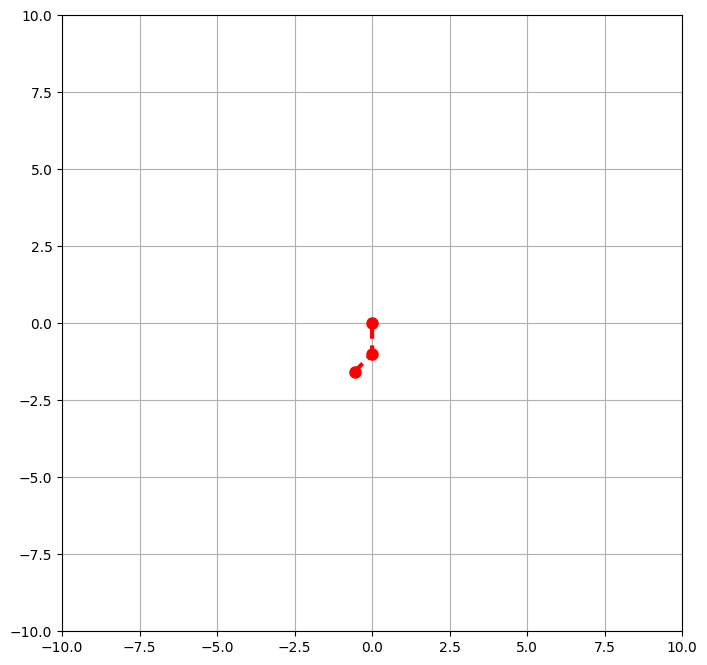

In [ ]:
def animate(i):
    ln1.set_data([0, x1[i], x2[i]], [0, y1[i], y2[i]])
    
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.grid()
ln1, = plt.plot([], [], 'ro--', lw=3, markersize=8)
ax.set_ylim(-10, 10)
ax.set_xlim(-10,10)
ani = animation.FuncAnimation(fig, animate, frames=len(t), interval=50)
ani.save('pen.gif',writer='pillow',fps=50)

Do the following:

* **[15 points]** Derive the dynamics of the system using Euler-Lagrange equations, and write the dynamics in the form: $\mathbf{M}(\mathbf{q})\ddot{\mathbf{q}} + \mathbf{C}(\mathbf{q},\dot{\mathbf{q}})\dot{\mathbf{q}} + \mathbf{g}(\mathbf{q}) = \mathbf{Q}$.

* **[15 points]** Set the external forces to zero: $\mathbf{Q} = \boldsymbol{0}$, and simulate the motion using a 4th-order Runge-Kutta algorithm, such that the system was initially at rest with the cartesian position of the second mass $\mathbf{r} 2 = [1.8, 0]$. Animate the resulting motion, plot the trajectories and the full energy of the system ( recall [practice 4](https://docs.google.com/document/d/17JVy8mS9g2jEDtrdaJnYGX3pBBGFVm5pjCG2oQ3rrS0/edit) )

* **[10 points]** Set the external torque on the first joint as follows: $\mathbf{Q}_1(t) = 10(\sin(t) - \mathbf{q}_1) - 0.2\dot{\mathbf{q}}_1$ and repeat the previous step.